# Vegetable Price Prediction Using Machine Learning
Implemented for West Bengal, Kolkata district, Bara Bazar market (Commodity = Onion) 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [19]:
vegetables = pd.read_csv('West_Bengal.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Jalpaiguri,Alipurduar,Potato,Red,FAQ,2185,2210,2200,30-Dec-19
1,2,Jalpaiguri,Alipurduar,Potato,Jyoti,FAQ,1785,1810,1800,30-Dec-19
2,3,Jalpaiguri,Alipurduar,Potato,Red,FAQ,2185,2210,2200,26-Dec-19
3,4,Jalpaiguri,Alipurduar,Potato,Jyoti,FAQ,1785,1810,1800,26-Dec-19
4,5,Jalpaiguri,Alipurduar,Potato,Red,FAQ,2185,2210,2200,24-Dec-19


# Drop Unnecessary Colums
Sl no, Commodity, Grade are not  useful so drop it

In [20]:
vegetables = vegetables.drop(['Sl no.','Commodity','Grade'], axis = 1)

# Data Selection

select District Name == Kolkata <br>
Select Market Name == Bara Bazar (Posta Bazar) <br>
Then Select Variety == Jyoti

In [21]:
vegetables = vegetables[vegetables['District Name'] == "Kolkata"]
vegetables = vegetables[vegetables['Market Name'] == "Bara Bazar (Posta Bazar)"]
vegetables = vegetables[vegetables['Variety'] == "Jyoti"]
vegetables.head()

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1550,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2200,2220,2220,31-Dec-19
1552,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2200,2220,2220,30-Dec-19
1554,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2280,2300,2300,27-Dec-19
1556,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2300,2320,2320,26-Dec-19
1558,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2360,2370,2360,24-Dec-19


In [22]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1567,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2000,2020,2000,17
1565,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2200,2210,2200,18
1564,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2160,2170,2160,19
1562,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2200,2240,2220,20
1560,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2350,2360,2360,23
1558,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2360,2370,2360,24
1556,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2300,2320,2320,26
1554,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2280,2300,2300,27
1552,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2200,2220,2220,30
1550,Kolkata,Bara Bazar (Posta Bazar),Jyoti,2200,2220,2220,31


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [23]:
climate = pd.read_csv('climate_Kolkata_210.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index District Name               Market Name Variety  \
0   2062       Kolkata  Bara Bazar (Posta Bazar)   Jyoti   
1   2060       Kolkata  Bara Bazar (Posta Bazar)   Jyoti   
2   2058       Kolkata  Bara Bazar (Posta Bazar)   Jyoti   
3   2056       Kolkata  Bara Bazar (Posta Bazar)   Jyoti   
4   2054       Kolkata  Bara Bazar (Posta Bazar)   Jyoti   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      640                      660   
1                      640                      660   
2                      640                      660   
3                      660                      680   
4                      660                      680   

   Modal Price (Rs./Quintal)  Price Date   Temp_Max   Temp_Avg  ...  \
0                        660           1  88.680952  79.795238  ...   
1                        660           2  88.595238  79.680952  ...   
2                        660           3  88.490476  79.561905  ...   
3                       

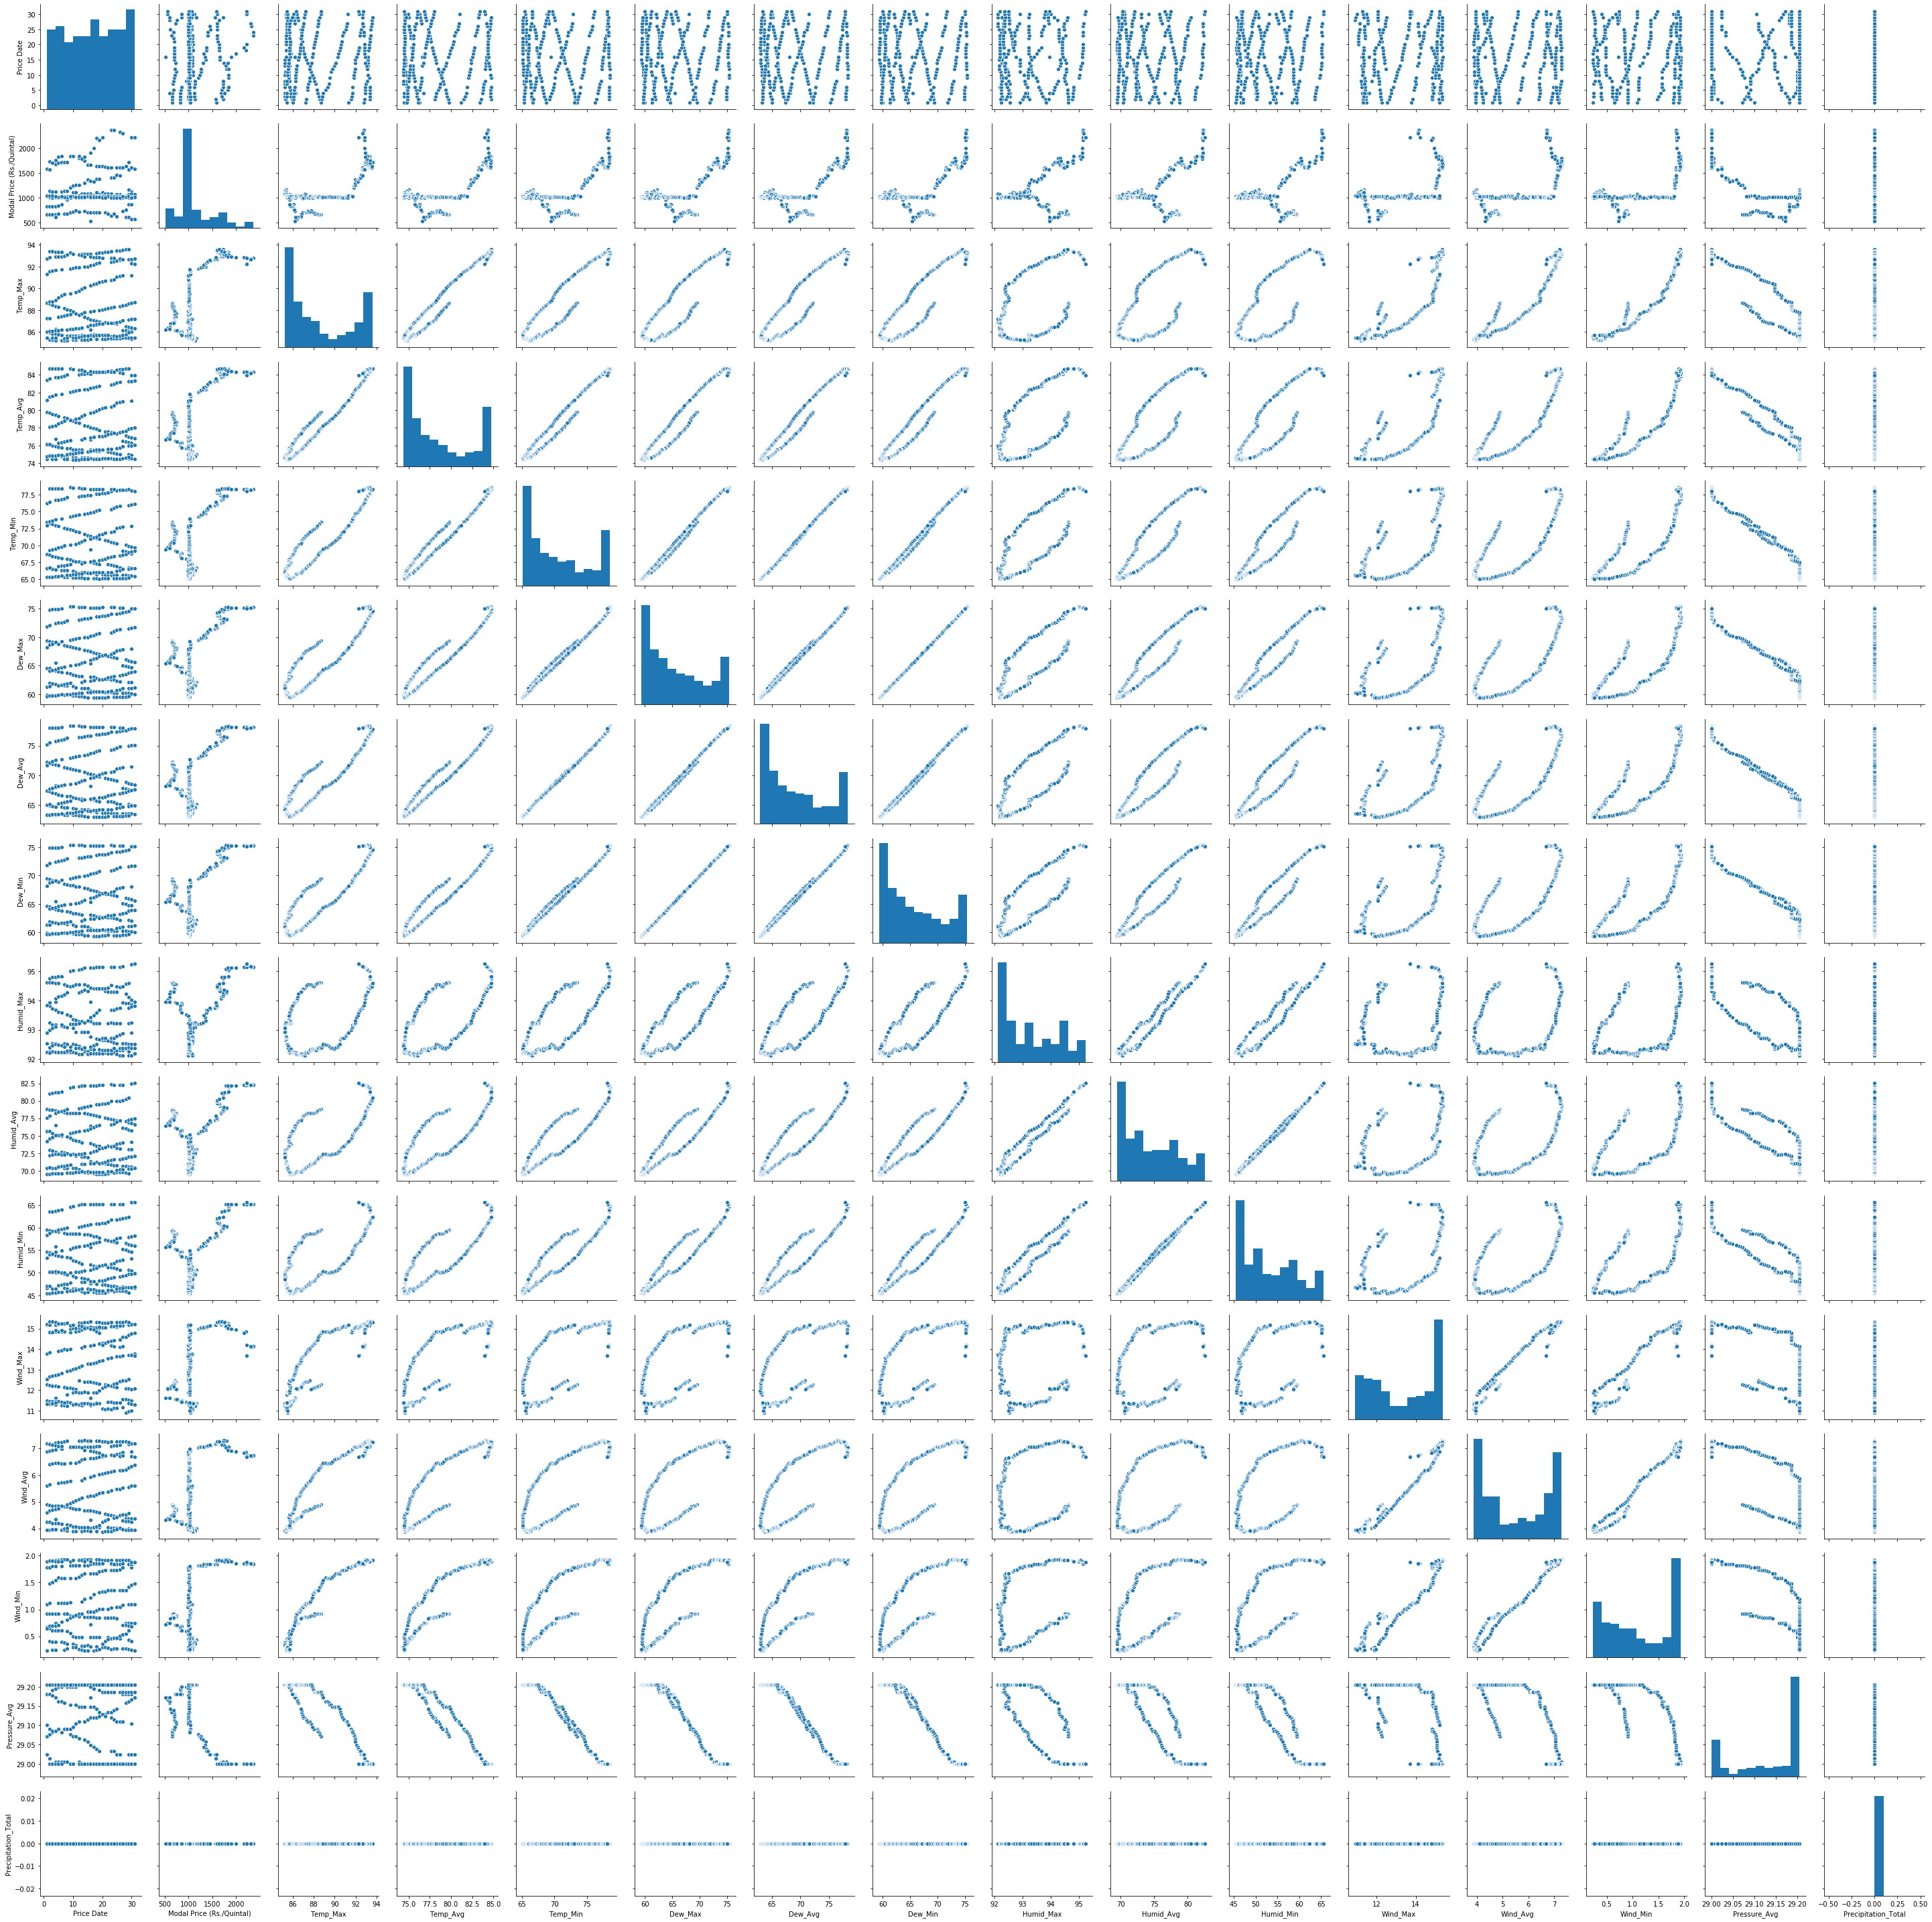

In [24]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [27]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 140,max_depth=300, random_state=42, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.4411468505859375


In [28]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [29]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.998769037712485
0.9919683258067835


# Feature Importance

In [30]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.03198720050952646
Temp_Max -> 0.08350318852799259
Temp_Avg -> 0.05658454618910039
Temp_Min -> 0.04485109647339578
Dew_Max -> 0.04585872784918306
Dew_Avg -> 0.046299380729470506
Dew_Min -> 0.044792750816313176
Humid_Max -> 0.19272867598269317
Humid_Avg -> 0.03461979046680076
Humid_Min -> 0.022376383411157105
Wind_Max -> 0.038056317679839045
Wind_Avg -> 0.04224646874099055
Wind_Min -> 0.027000705877506952
Pressure_Avg -> 0.2890947667460304
Precipitation_Total -> 0.0


In [31]:
'''import pickle
with open("Karad_learn_max", "rb") as f:
    rf = pickle.load(f)
rf.predict()

print(np.reshape(predicted,(len(y_test),1))- np.reshape(y_test,(len(y_test),1)))
print(predicted, y_test)
'''

'import pickle\nwith open("Karad_learn_max", "rb") as f:\n    rf = pickle.load(f)\nrf.predict()\n\nprint(np.reshape(predicted,(len(y_test),1))- np.reshape(y_test,(len(y_test),1)))\nprint(predicted, y_test)\n'

In [32]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

600.5714285714286->560
685.5714285714286->680
1020.9285714285714->1020
1010.7142857142857->1020
1001.1428571428571->1000
1004.0->1020
1702.2857142857142->1720
1011.5->1000
712.7857142857143->740
1019.5714285714286->1020
1038.5714285714287->1020
1775.357142857143->1740
1015.4285714285714->1020
1001.1428571428571->1000
1014.8571428571429->1020
1912.0->1900
1293.4285714285713->1360
699.2142857142857->700
1751.2142857142858->1700
997.0714285714286->1060
1007.8571428571429->1060
666.5714285714286->640
2274.285714285714->2360
807.1428571428571->860
1030.0->1040
1632.2857142857142->1720
720.7142857142857->720
1359.857142857143->1320
2249.0->2320
1010.6428571428571->1000
1017.9285714285714->1020
1602.0->1600
594.7142857142857->560
1251.642857142857->1260
684.0->680
1080.4285714285713->1080
1630.0->1620
1116.2857142857142->1140
1008.4285714285714->1020
1620.7857142857142->1580
1819.2142857142858->1840
1015.5714285714286->1040
1011.0->1010
697.4285714285714->700
1011.2857142857143->1010
1080.285

In [33]:
print(sum_a/l)

21.977182539682538
